In [55]:
from sklearn.datasets import make_classification,make_moons
import matplotlib.pyplot as plt

In [56]:
x,y=make_classification(n_samples=500,n_features=2,n_redundant=0,n_clusters_per_class=1)
x_nl,y_nl=make_moons(n_samples=500,noise=0.2)

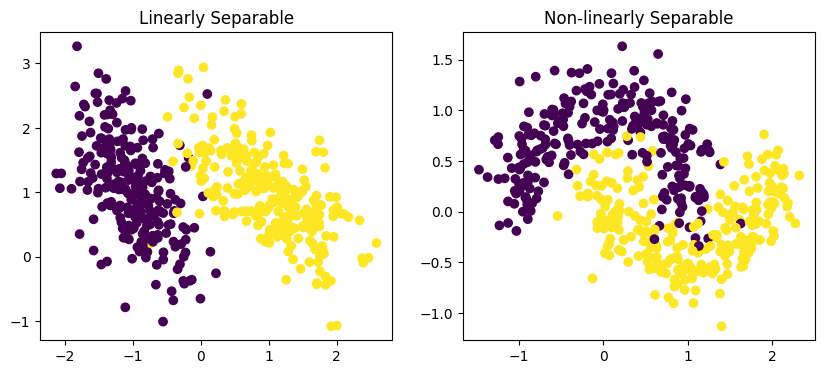

In [57]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.title("Linearly Separable")

plt.subplot(1, 2, 2)
plt.scatter(x_nl[:, 0], x_nl[:, 1], c=y_nl)
plt.title("Non-linearly Separable")
plt.show()

In [58]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset,DataLoader

In [59]:
def prepare_loader(X,y,batch_size=32):
    X_tensor=torch.tensor(X,dtype=torch.float32)
    y_tensor=torch.tensor(y,dtype=torch.long)
    return DataLoader(TensorDataset(X_tensor,y_tensor),batch_size=batch_size,shuffle=True)


In [60]:
class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc=nn.Linear(2,2)
    def forward(self, x):
        return self.fc(x)

In [61]:
class nonlinear(nn.Module):
    def __init__(self):
        super().__init__()
        self.model=nn.Sequential(
            nn.Linear(2,32),
            nn.ReLU(),
            nn.Linear(32,2)
            )
    def forward(self,x):
        return self.model(x)


In [62]:
def train(model,loader,epoch=20):
    optimizer=torch.optim.Adam(model.parameters(),lr=0.01)
    lossfn=nn.CrossEntropyLoss()

    for epoch in range(epoch):
        for xb,yb in loader:
            pred=model(xb)
            loss=lossfn(pred,yb)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
lin_loader=prepare_loader(x,y)
nl_loader=prepare_loader(x_nl,y_nl)

In [63]:
lm1=LinearModel()
train(lm1,lin_loader)
lm2=LinearModel()
train(lm2,nl_loader)

In [64]:
nlm1=nonlinear()
train(nlm1,lin_loader)
nlm2=nonlinear()
train(nlm2,nl_loader)

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    model.eval()
    X = torch.tensor(X, dtype=torch.float32)

    # Create meshgrid over the data space
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Flatten the grid to pass through model
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    with torch.no_grad():
        preds = model(grid)
        preds = torch.argmax(preds, dim=1).numpy()

    # Reshape predictions back to mesh shape
    preds = preds.reshape(xx.shape)

    # Plot the contour and original points
    plt.contourf(xx, yy, preds, alpha=0.5, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()


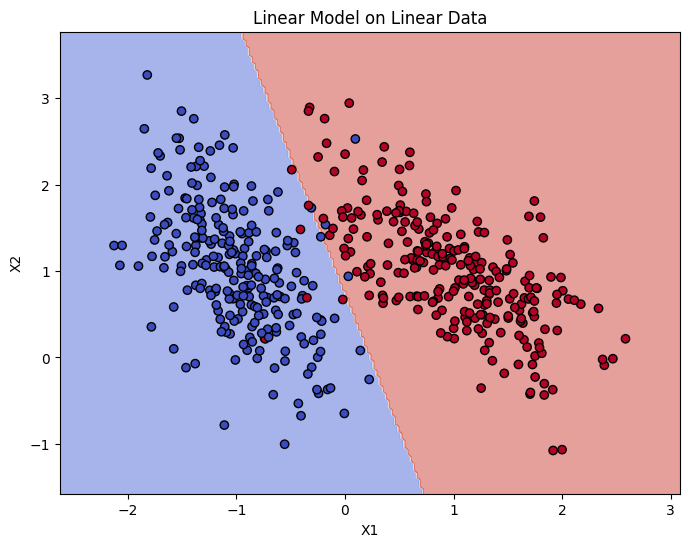

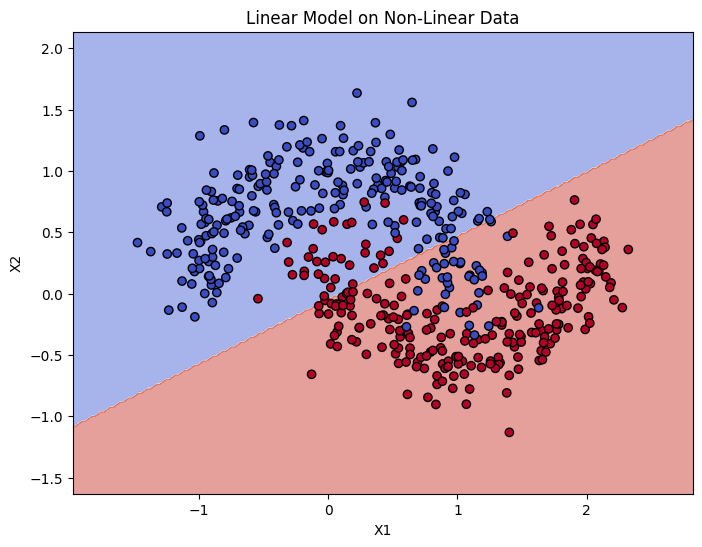

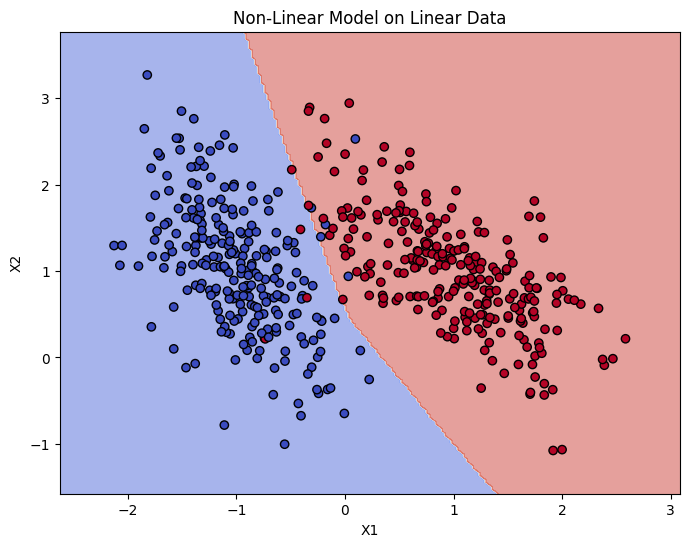

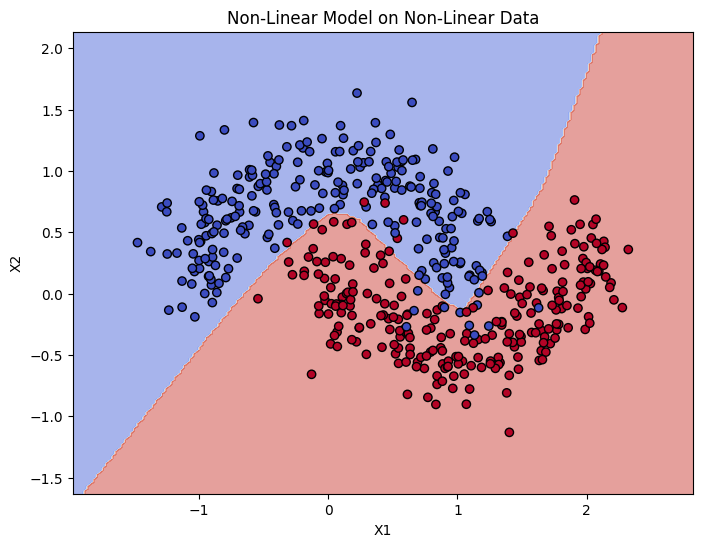

In [85]:
plot_decision_boundary(lm1, x, y, title="Linear Model on Linear Data")
plot_decision_boundary(lm2, x_nl, y_nl, title="Linear Model on Non-Linear Data")
plot_decision_boundary(nlm1, x, y, title="Non-Linear Model on Linear Data")
plot_decision_boundary(nlm2, x_nl, y_nl, title="Non-Linear Model on Non-Linear Data")
